<a href="https://colab.research.google.com/github/danielruizm16/ComputationalMethods/blob/main/ODEs/ODEs_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary Differential Equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1.
The number of radioactive atoms that decay in a given time period is proportional to the number of atoms in the sample:

$$
\frac{dN}{dt} = -\lambda N
$$

with $\lambda=\frac{\ln{2}}{t_{1/2}}$ where $t_{1/2}$ is the half-life.

Write a program that uses the Euler method to plot $N(t)$. Compare with the exact solution, $N(t) = N_0 e^{-\lambda t}$, for comparison. Take $N_0=1000$ and $t_{1/2}=15$ hours, which is the value for $^{24}$Na.

In [2]:
# Parameters
N0 = 1000  # Initial number of atoms
t1_2=15 #En horas para el plutonio
lambda_ = np.log(2)/t1_2  # Decay constant
t_max = 70  # Maximum time
dt = 0.1  # Time step
f=lambda t,N: -lambda_*N  #f(t,N)

In [3]:
def Euler(f, x0, y0, h, x_end):
    """
    Implements the Euler method to solve an ordinary differential equation (ODE) of first order.
    y(xn + 1) = y(xn) + h * f(xn, yn)

    Args:
        f: The function that defines the ODE, dy/dx = f(x, y). Must accept two arguments: x and y. -> Callable
        x0: The initial condition for the independent variable (x). -> float
        y0: The initial condition for the dependent variable (y) at x0. -> float
        h: The step size (increment in x) for the iteration. -> float
        x_end: The final value of x up to which the solution should be approximated. -> float

    Returns:
        A tuple (x, y) where:
        x: A numpy array with the x values at each step. -> Array
        y: A numpy array with the approximations of y corresponding to each x value. -> Array
    """
    # Calculate the number of steps needed to go from x0 to x_end with a step size h.
    n_steps = int((x_end - x0) / h)

    # Initialize numpy arrays to store the x and y values at each step.
    # Space is created for n_steps + 1 points, including the initial point.
    x = np.zeros(n_steps + 1)
    y = np.zeros(n_steps + 1)

    # Set the initial condition as the first element of the arrays.
    x[0] = x0
    y[0] = y0

    # Iterate over the number of steps to apply the Euler method formula.
    for i in range(n_steps):
        # Calculate the next x value by adding the step size h to the current x value.
        x[i+1] = x[i] + h
        # Apply the Euler method formula to calculate the approximation of the next y value:
        # y[i+1] = y[i] + h * f(x[i], y[i])
        # where f(x[i], y[i]) is the slope at the current point (x[i], y[i]) according to the ODE.
        y[i+1] = y[i] + h * f(x[i], y[i])

    # Return the calculated arrays of x and y values.
    return x, y

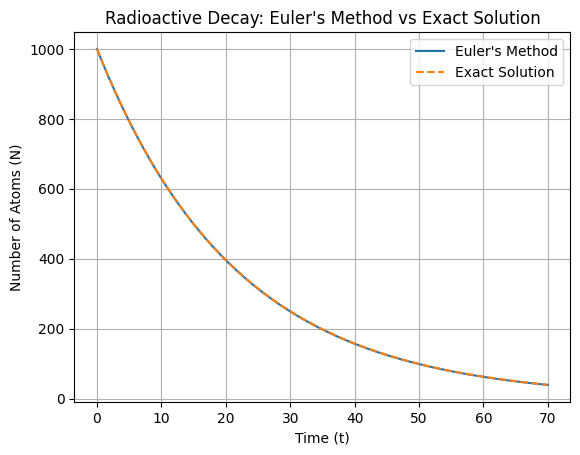

In [4]:
# Euler's method
t_euler=Euler(f,0,N0,dt,t_max)[0]
N_euler = Euler(f,0,N0,dt,t_max)[1]
# Exact solution
t = np.arange(0, t_max, dt)
N_exact = N0 * np.exp(-lambda_ * t)

# Plotting
plt.plot(t_euler, N_euler, label="Euler's Method")
plt.plot(t, N_exact, label="Exact Solution", linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('Number of Atoms (N)')
plt.title('Radioactive Decay: Euler\'s Method vs Exact Solution')
plt.legend()
plt.grid()
plt.show()

A different approach without the previous function

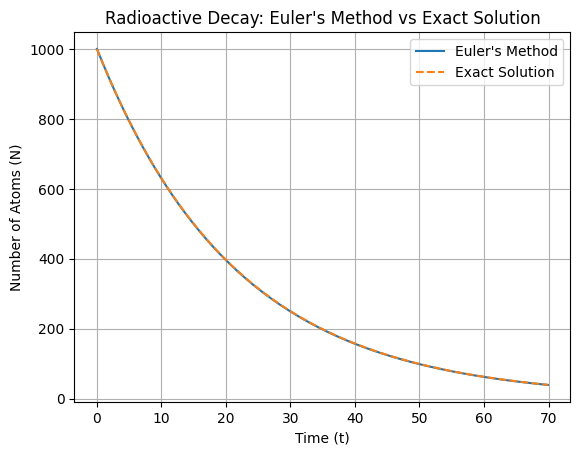

In [5]:
# Time array
t = np.arange(0, t_max, dt)

# Euler's method
N_euler = np.zeros(len(t))
N_euler[0] = N0

for i in range(1, len(t)):
    N_euler[i] = N_euler[i-1] -lambda_ * N_euler[i-1] * dt

# Exact solution
N_exact = N0 * np.exp(-lambda_ * t)

# Plotting
plt.plot(t, N_euler, label="Euler's Method")
plt.plot(t, N_exact, label="Exact Solution", linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('Number of Atoms (N)')
plt.title('Radioactive Decay: Euler\'s Method vs Exact Solution')
plt.legend()
plt.grid()
plt.show()

# 2
The pendulum in the figure is suspended from a sliding collar. The system is at rest when an oscillatory motion $y(t)=Y \sin{\omega t}$ is imposed on the bead, starting at $t=0$. The differential equation describing the pendulum's motion is

$$
\ddot{\theta}=-\frac{g}{L} \sin{\theta} + \frac{\omega^2}{L}Y \cos{\theta}\sin{\omega t}
$$

Plot $\theta$ vs $t$ with $0\leq t \leq 10$ s and determine the largest $\theta$ in this interval. Use $g=9.8 \ \text{m/s}^2$, $L=1.0 \ \text{m}$, $Y=0.25 \ \text{m}$ and $\omega=2.5 \ \text{rad/s}$. With $\theta(0)=0$ and $\dot{\theta}(0)=0.1$.

<center>

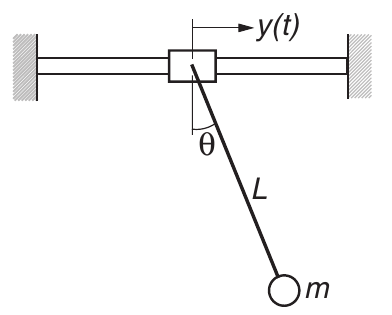

</center>

In [6]:
def Euler_2nd_order(f, t0, y0, yp0, h, t_end):
    """
    Implements the Euler method to solve a second-order ordinary differential equation (ODE).

    Considers an ODE of the form:
        d²y/dt² = f(t, y, dy/dt)
    which is transformed into a first-order system:
        dy/dt = v
        dv/dt = f(t, y, v)

    Args:
        f: The function that defines the second derivative, d²y/dt² = f(t, y, dy/dt). Must accept three arguments: t, y, dy/dt. -> Callable
        t0: The initial condition for the independent variable (t). -> float
        y0: The initial condition for the dependent variable (y) at t0. -> float
        yp0: The initial condition for the derivative of y (dy/dt) at t0. -> float
        h: The step size (increment in t) for the iteration. -> float
        t_end: The final value of t up to which the solution should be approximated. -> float

    Returns:
        A tuple (t, y, yp) where:
        t: A numpy array with the t values at each step. -> ndarray
        y: A numpy array with the approximations of y corresponding to each t value. -> ndarray
        yp: A numpy array with the approximations of dy/dt corresponding to each t value. -> ndarray
    """
    # Calculate the total number of steps required
    n_steps = int((t_end - t0) / h)

    # Initialize arrays for time, the function, and its derivative
    t = np.zeros(n_steps + 1)
    y = np.zeros(n_steps + 1)
    yp = np.zeros(n_steps + 1)

    # Set the initial conditions
    t[0] = t0
    y[0] = y0
    yp[0] = yp0

    # Apply the Euler method step by step
    for i in range(n_steps):
        t[i+1] = t[i] + h                      # Advance time
        y[i+1] = y[i] + h * yp[i]              # Calculate y with dy/dt = yp
        yp[i+1] = yp[i] + h * f(t[i], y[i], yp[i])  # Calculate dy/dt with d²y/dt² = f

    return t, y, yp

In [7]:
# Problem parameters
g = 9.8
L = 1.0
Y = 0.25
omega = 2.5


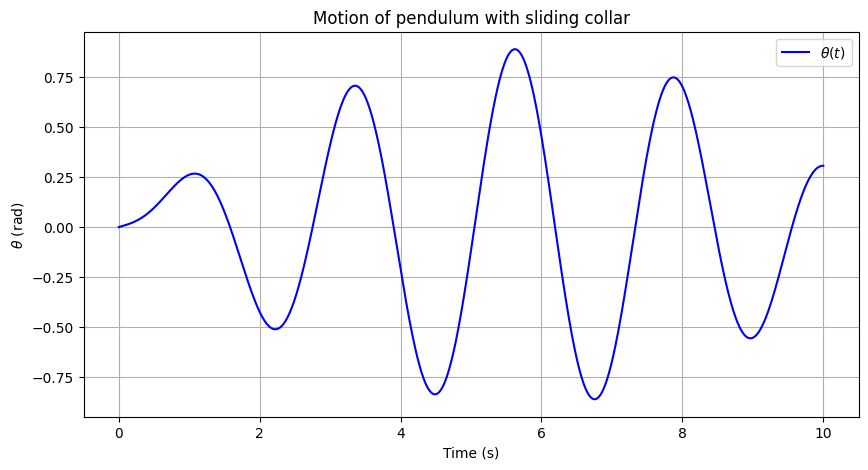

In [8]:

# Define the function f(t, theta, theta_p) = theta_pp
def f(t, theta, theta_p):
    return - (g / L) * np.sin(theta) + (omega**2 / L) * Y * np.cos(theta) * np.sin(omega * t)

# Initial conditions
theta0 = 0.0       # theta(0) = 0
theta_p0 = 0.1      # theta'(0) = 0.1

# Integration setup
t0 = 0.0
t_end = 10.0
h = 0.01  # Time step

# Solve the ODE
t, theta, theta_p = Euler_2nd_order(f, t0, theta0, theta_p0, h, t_end)

# Plot theta(t)
plt.figure(figsize=(10, 5))
plt.plot(t, theta, label=r'$\theta(t)$', color='blue')
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$ (rad)')
plt.title('Motion of pendulum with sliding collar')
plt.grid()
plt.legend()
plt.show()

In [9]:
# Find the maximum value of theta in the interval
theta_max = np.max(np.abs(theta))  # Maximum value in magnitude
theta_max_rad = theta_max
theta_max_deg = np.degrees(theta_max_rad)  # Convert to degrees for reference

print(f"The maximum value of theta in the interval is: {theta_max_rad:.4f} rad ({theta_max_deg:.2f}°)")

The maximum value of theta in the interval is: 0.8901 rad (51.00°)


# 3.

<center>

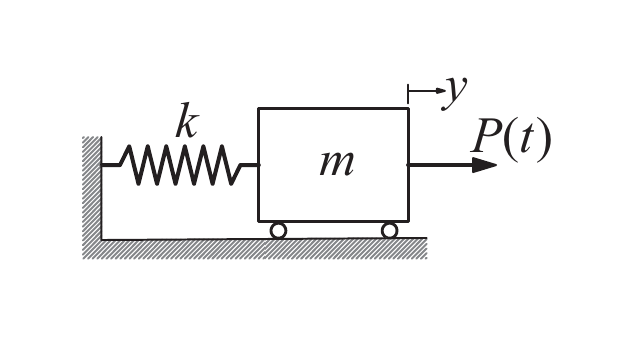

</center>

The mass-spring system is at rest when the force $P(t)$ is applied, where

$$
P(t) = 
\begin{cases} 
10t \ \text{N} & \text{when } t < 2 \ \text{s} \\
20 \ \text{N} & \text{when } t \geq 2 \ \text{s}
\end{cases}
$$

The differential equation of the resulting motion is

$$
\ddot{y} = \frac{P(t)}{m} - \frac{k}{m} y
$$

Determine the maximum displacement of the mass. Use $m = 2.5 \ \text{kg}$ and $k = 75 \ \text{N/m}$.


In [10]:
def euler_matrix_method(A, b, y0, h, x0, x_end):
    """
    Matrix Euler method to solve dY/dx = A*Y + b

    Parameters:
    A: System matrix (numpy array of size n x n)
    b: Vector (numpy array of size n)
    y0: Vector of initial conditions (numpy array of size n)
    h: Step size
    x0: Initial value of x
    x_end: Final value of x

    Returns:
    x: Vector of x values
    Y: Matrix where each row represents the vector Y at each step
    """
    # Calculate the number of steps
    n_steps = int((x_end - x0) / h)

    # System dimension
    n = len(y0)

    # Initialize arrays
    x = np.zeros(n_steps + 1)
    Y = np.zeros((n_steps + 1, n))

    # Set initial conditions
    x[0] = x0
    Y[0] = y0

    # Evolution matrix
    evolution_matrix = np.eye(n) + h * A

    # Iterate applying the Euler method
    for i in range(n_steps):
        x[i+1] = x[i] + h
        Y[i+1] = evolution_matrix @ Y[i] + h * b(x[i])  

    return x, Y

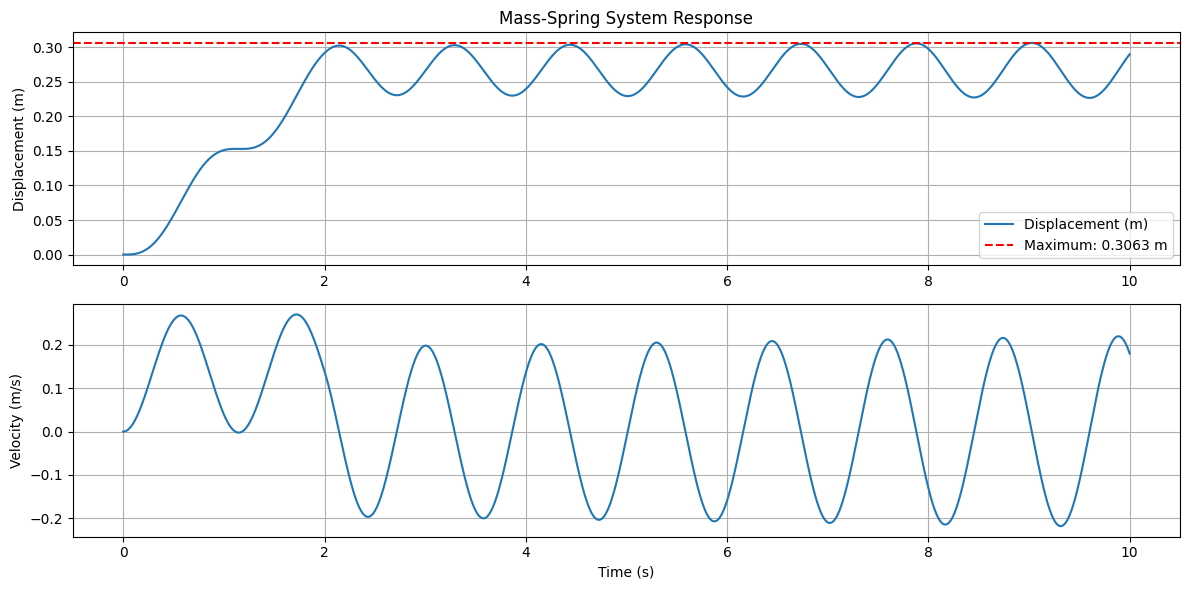

The maximum displacement is: 0.3063 m occurring at t = 9.03 s


In [11]:

# System parameters
m = 2.5  # kg
k = 75   # N/m

# Define the force P(t)
def P(t):
    if t < 2:
        return 10 * t
    else:
        return 20

# Define matrix A and function b(t)
A = np.array([[0, 1], [-k/m, 0]])

def b_vector(t):
    return np.array([0, P(t)/m])

# Initial conditions (system at rest)
y0 = np.array([0.0, 0.0])

# Simulation parameters
t0 = 0.0
t_end = 10.0
h = 0.001

# Solve the system
t, Y = euler_matrix_method(A, b_vector, y0, h, t0, t_end)

# Extract displacement (y1) and velocity (y2)
y1 = Y[:, 0]
y2 = Y[:, 1]

# Find maximum displacement
max_disp = np.max(np.abs(y1))
max_disp_time = t[np.argmax(np.abs(y1))]

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, y1, label='Displacement (m)')
plt.axhline(y=max_disp, color='r', linestyle='--', label=f'Maximum: {max_disp:.4f} m')
plt.legend()
plt.grid()
plt.ylabel('Displacement (m)')
plt.title('Mass-Spring System Response')

plt.subplot(2, 1, 2)
plt.plot(t, y2, label='Velocity (m/s)')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

plt.tight_layout()
plt.show()

print(f"The maximum displacement is: {max_disp:.4f} m occurring at t = {max_disp_time:.2f} s")

# 4.

The logistic equation is a simple differential equation model that can be used to relate the change in population $\frac{dP}{dt}$ to the current population, $P$, given a growth rate, $r$, and a carrying capacity, $K$. The logistic equation can be expressed as

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Write a function `my_logistic_eq(t, P, r, K)` that represents the logistic equation returning `dP`. Assume that the arguments `dP`, `t`, `P`, `r` and `K` are all scalars, and `dP` is the value $\frac{dP}{dt}$ given $r$, $P$ y $K$.
Note that the logistic equation has an analytical solution defined by

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
where $P_0$ is the initial population.

- Plot $P$ vs $t$ using the RK2 and RK4 methods, comparing with the analytical solution.
- Calculate the relative error of both solutions, considering the analytical solution as reference.

# 5.
Consider the mass-spring system shown in the figure with a non-negligible friction coefficient $\mu$. Generate a plot of position vs. time for the motion of the mass, given an initial displacement $x = 0.2$ m, spring constant $k = 42$ N/m, mass $m = 0.25$ kg, friction coefficient $\mu = 0.15$, and initial velocity $v = 0$.

<center>

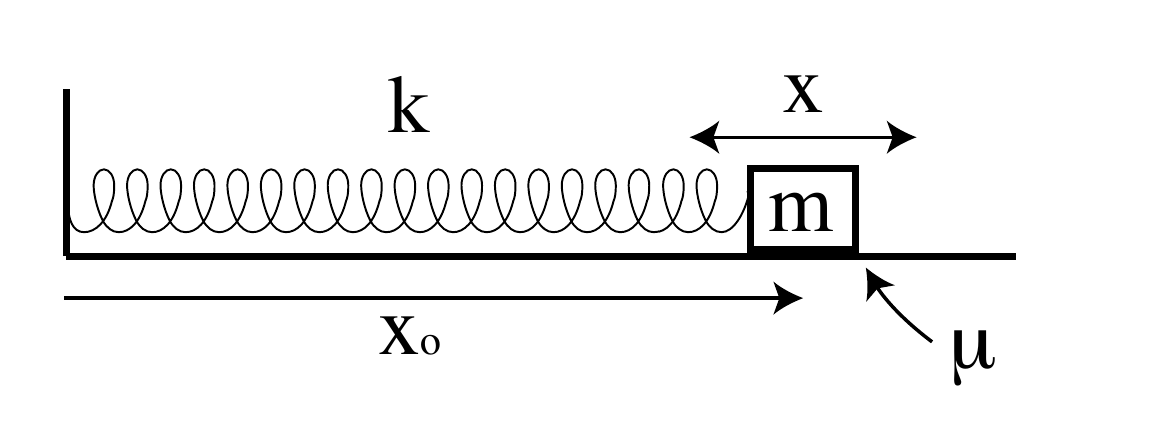

</center>

# 6.
In a dynamics laboratory, the behavior of two coupled pendulums via a spring with elastic constant $k$ is studied. Each pendulum of length $L$ and mass $m$ is suspended from a fixed support and oscillates in the plane. Small displacements are assumed, allowing the motion to be approximated by linear differential equations.

The equations of motion for the angles $\theta_1(t)$ and $\theta_2(t)$ of the pendulums relative to the vertical are given by the system:

$$
\begin{aligned}
mL^2 \ddot{\theta}_1 + mgL\theta_1 + kL^2(\theta_1 - \theta_2) &= 0, \\
mL^2 \ddot{\theta}_2 + mgL\theta_2 + kL^2(\theta_2 - \theta_1) &= 0.
\end{aligned}
$$

Defining the state vector $\mathbf{y} = [\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]^T$, write the system in matrix form as a first-order equation:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

where $\mathbf{A}$ is the coefficient matrix of the system.

- Express the system in the form of first-order differential equations.
- Construct the matrix $\mathbf{A}$ of the system.
- Solve the system using the \textbf{fourth-order Runge-Kutta method (RK4)}.
- Plot the time evolution of the angles $\theta_1(t)$ and $\theta_2(t)$.
- Represent the trajectory in the phase space $(\theta_1, \dot{\theta}_1)$ and $(\theta_2, \dot{\theta}_2)$.

For the simulation, you can use the values:
- $m = 1$ kg,
- $L = 1$ m,
- $g = 9.81$ m/s²,
- $k = 0.5$ N/m,
- Initial conditions: $\theta_1(0) = 0.1$, $\dot{\theta}_1(0) = 0$, $\theta_2(0) = 0$, $\dot{\theta}_2(0) = 0$.
- Simulation interval: $t \in [0,10]$ s with step $\Delta t = 0.01$ s.

# 7.
One of the most famous sets of differential equations in physics are the Lorenz equations:

$$
\frac{dx}{dt} = \sigma (y - x), \quad \frac{dy}{dt} = r x - y - x z, \quad \frac{dz}{dt} = x y - b z,
$$

where $\sigma$, $r$, and $b$ are constants. (The names $\sigma$, $r$, and $b$ are peculiar but traditional — they are always used in these equations for historical reasons.)

These equations were first studied by Edward Lorenz in 1963, who derived them from a simplified model of weather patterns. The reason for their fame is that they were one of the first examples of deterministic chaos, the appearance of seemingly random motion despite there being no randomness in the equations.

- Write a program to solve the Lorenz equations for the case $\sigma = 10$, $r = 28$, and $b = \frac{8}{3}$ in the interval from $t = 0$ to $t = 50$ with initial conditions $(x, y, z) = (0, 1, 0)$. Make your program generate a plot of $y$ as a function of time. Observe the unpredictable nature of the motion.

- Modify your program to produce a plot of $z$ as a function of $x$.

# 8.

A mass $m$ is attached to a spring with elastic constant $k$, which is fixed to a support point as shown in the figure. The length of the resulting pendulum at any instant is the natural length of the spring $x_0$ plus the stretch (or compression) $x$, and the pendulum angle relative to the vertical is $\theta$. This is an example of a coupled oscillator system: the pendulum oscillations in $\theta$ interact with the spring oscillations in $x$, producing a complex mixture of both. The differential equations for this system are given by:


$$
\ddot{L} = (L_o + L) \dot{\theta}^2 - \frac{k}{m} L + g \cos \theta
$$

$$
\ddot{\theta} = -\frac{1}{L_o + L} \left[ g \sin \theta + 2 \dot{L} \dot{\theta} \right]
$$

Write a program that plots the motion of the mass for some initial $\theta \neq 0$.

<center>

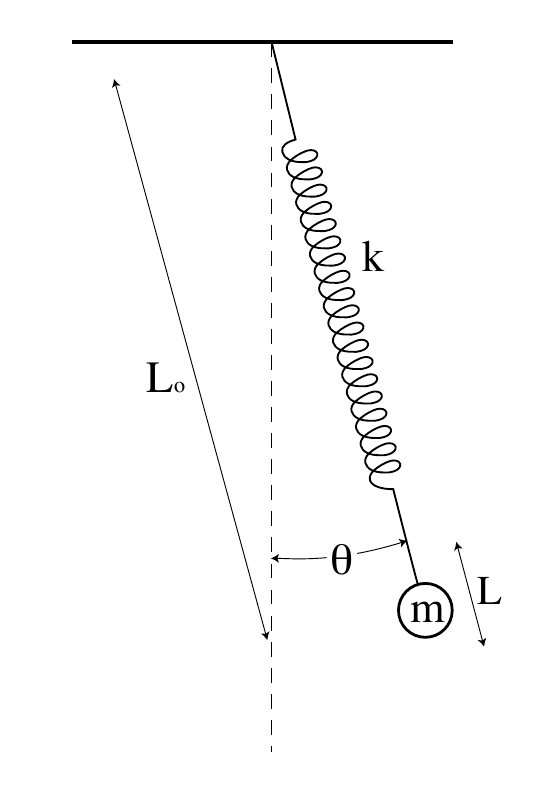

</center>